FAKE NEWS DETECTION

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [4]:
df = pd.read_csv("news.csv")
print(df)

      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinter

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [8]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [10]:
x = df['label']

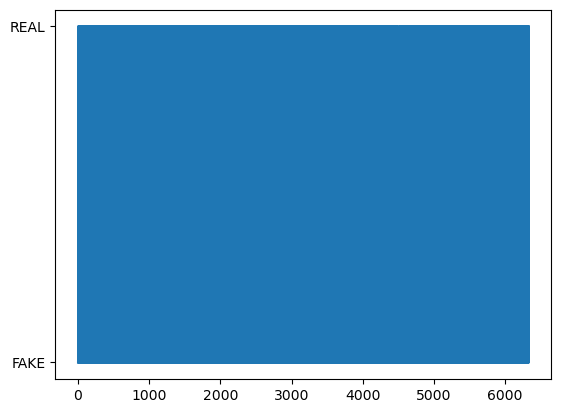

In [11]:
plt.plot(x)
plt.show()

In [12]:
labels = df.label

In [13]:
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [14]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2, random_state=20)

In [17]:
x_train

4741    NAIROBI, Kenya — President Obama spoke out Sun...
2089    Killing Obama administration rules, dismantlin...
4074    Dean Obeidallah, a former attorney, is the hos...
5376      WashingtonsBlog \nCNN’s Jake Tapper hit the ...
6028    Some of the biggest issues facing America this...
                              ...                        
5910      From the day we are born into this world, we...
3915    Chaosistan , Iraq , Phenomenon of Terrorism By...
1428    Senate Minority Leader Harry M. Reid (D-Nev.) ...
4367    WASHINGTON — The U.S. government started keepi...
2522    Gary Johnson is the presidential nominee for t...
Name: text, Length: 5068, dtype: object

In [18]:
x_test

4494    Print \nSome of the emails that have come to t...
2548    First Civilians From Surrounding Towns Arrive ...
5397    Washington Free Beacon October 26, 2016 \nDr. ...
3998    Originally published by the Jerusalem Post . \...
1982    in: News Articles , Preparedness\Survival Back...
                              ...                        
3865    The scene was Ostroh, western Ukraine, on the ...
680     Will the anti-Clinton revolt among American el...
4424    The Obama administration just wrapped up anoth...
1470    at 3:02 pm Leave a comment \nAs the technology...
5907    "It ought be a local decision. I mean, a state...
Name: text, Length: 1267, dtype: object

In [19]:
y_train

4741    REAL
2089    REAL
4074    REAL
5376    FAKE
6028    REAL
        ... 
5910    FAKE
3915    FAKE
1428    REAL
4367    REAL
2522    REAL
Name: label, Length: 5068, dtype: object

In [20]:
y_test

4494    FAKE
2548    FAKE
5397    FAKE
3998    FAKE
1982    FAKE
        ... 
3865    REAL
680     FAKE
4424    REAL
1470    FAKE
5907    REAL
Name: label, Length: 1267, dtype: object

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer  #convert the raw text to numerical form
from sklearn.linear_model import PassiveAggressiveClassifier

In [22]:
# initialize a Tfidf vectorizer
vector = TfidfVectorizer(stop_words='english', max_df=0.7)
# stop_words - reduces the number of features, which decreases the computational load and help module focus on more significant words
# max_df - ignore term whose frequency is more than 70%

In [23]:
# fit and transform
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

In [24]:
#initialize linear model
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [25]:
#prediction the test data
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = pac.predict(tf_test)

In [26]:
score = accuracy_score(y_test, y_pred)

In [27]:
print(f"Accuracy: {round(score*100,2)}%")

Accuracy: 95.03%


In [28]:
# confusion metrics
confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

array([[624,  24],
       [ 39, 580]])

In [29]:
import joblib
filename = "Finalized_model.pkl"
joblib.dump(pac, filename)
print(f"File is successfully dumoed to {filename} ")

File is successfully dumoed to Finalized_model.pkl 


In [31]:
filename = "vectorizer.pkl"
joblib.dump(vector, open(filename, 'wb'))